# Importing different data science libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import pickle
import math
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/diamonds.csv")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Removing The dimentionless diamonds

In [ ]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

# Before Removing the outliers


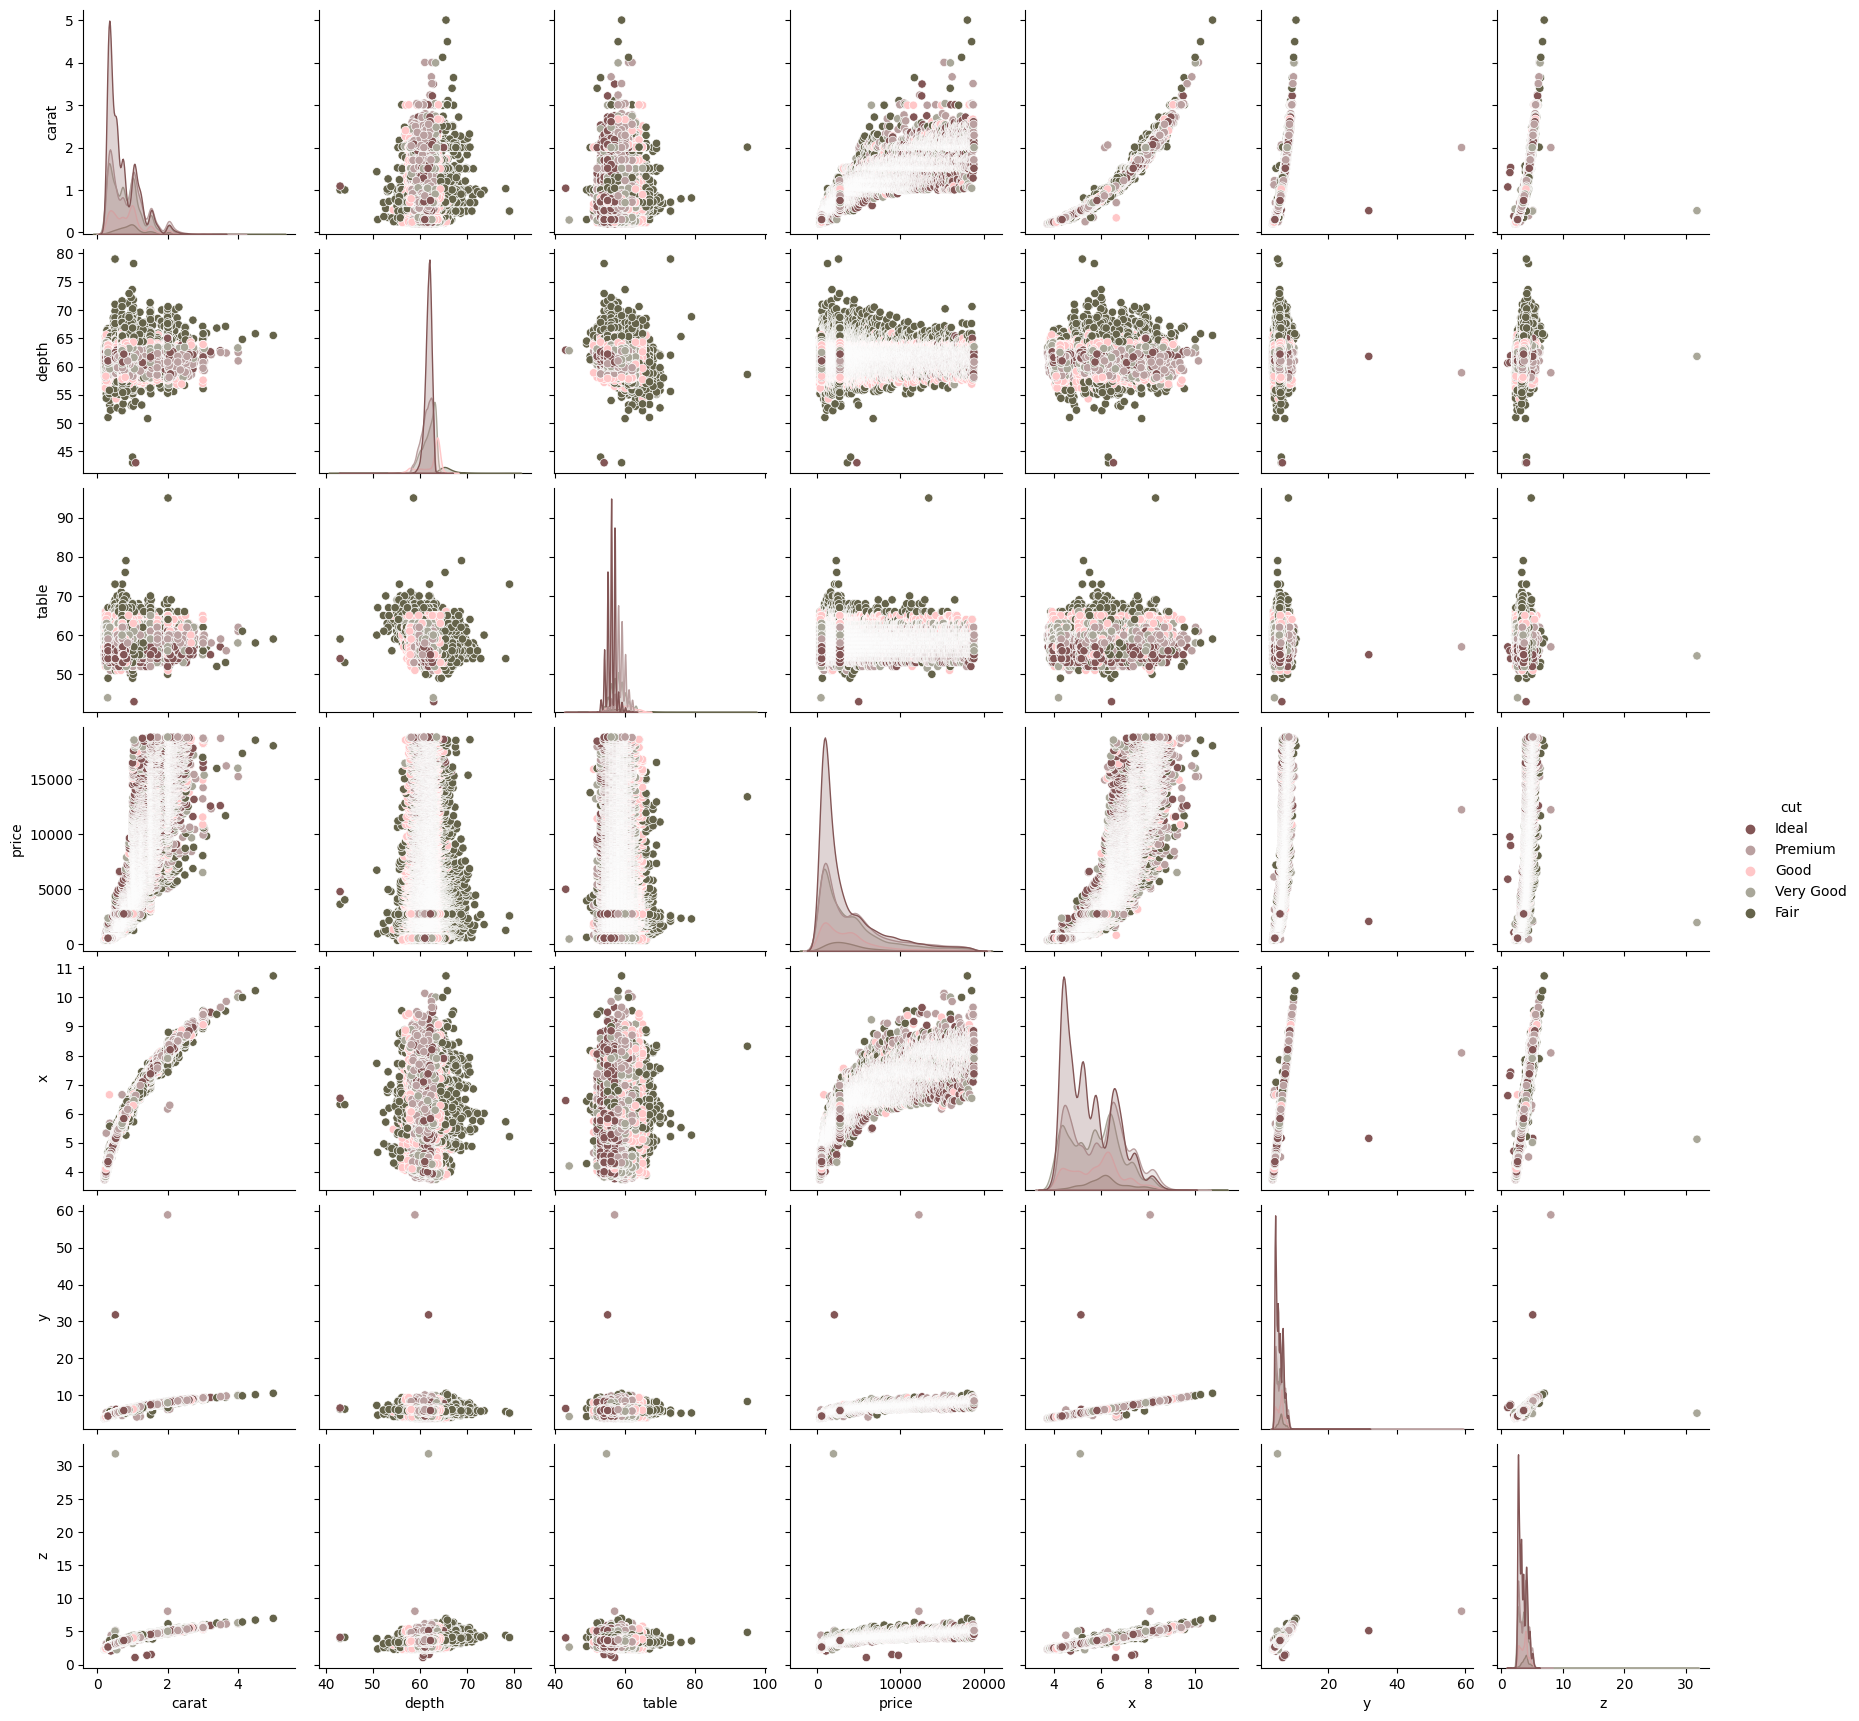

In [ ]:
shade = ["#835656", "#baa0a0", "#ffc7c8", 
         "#a9a799", "#65634a"]#shades for hue
ax = sns.pairplot(data, 
                  hue= "cut",palette=shade)

# Dropping the outliers. 

In [ ]:
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]

# After Removing The Outliers

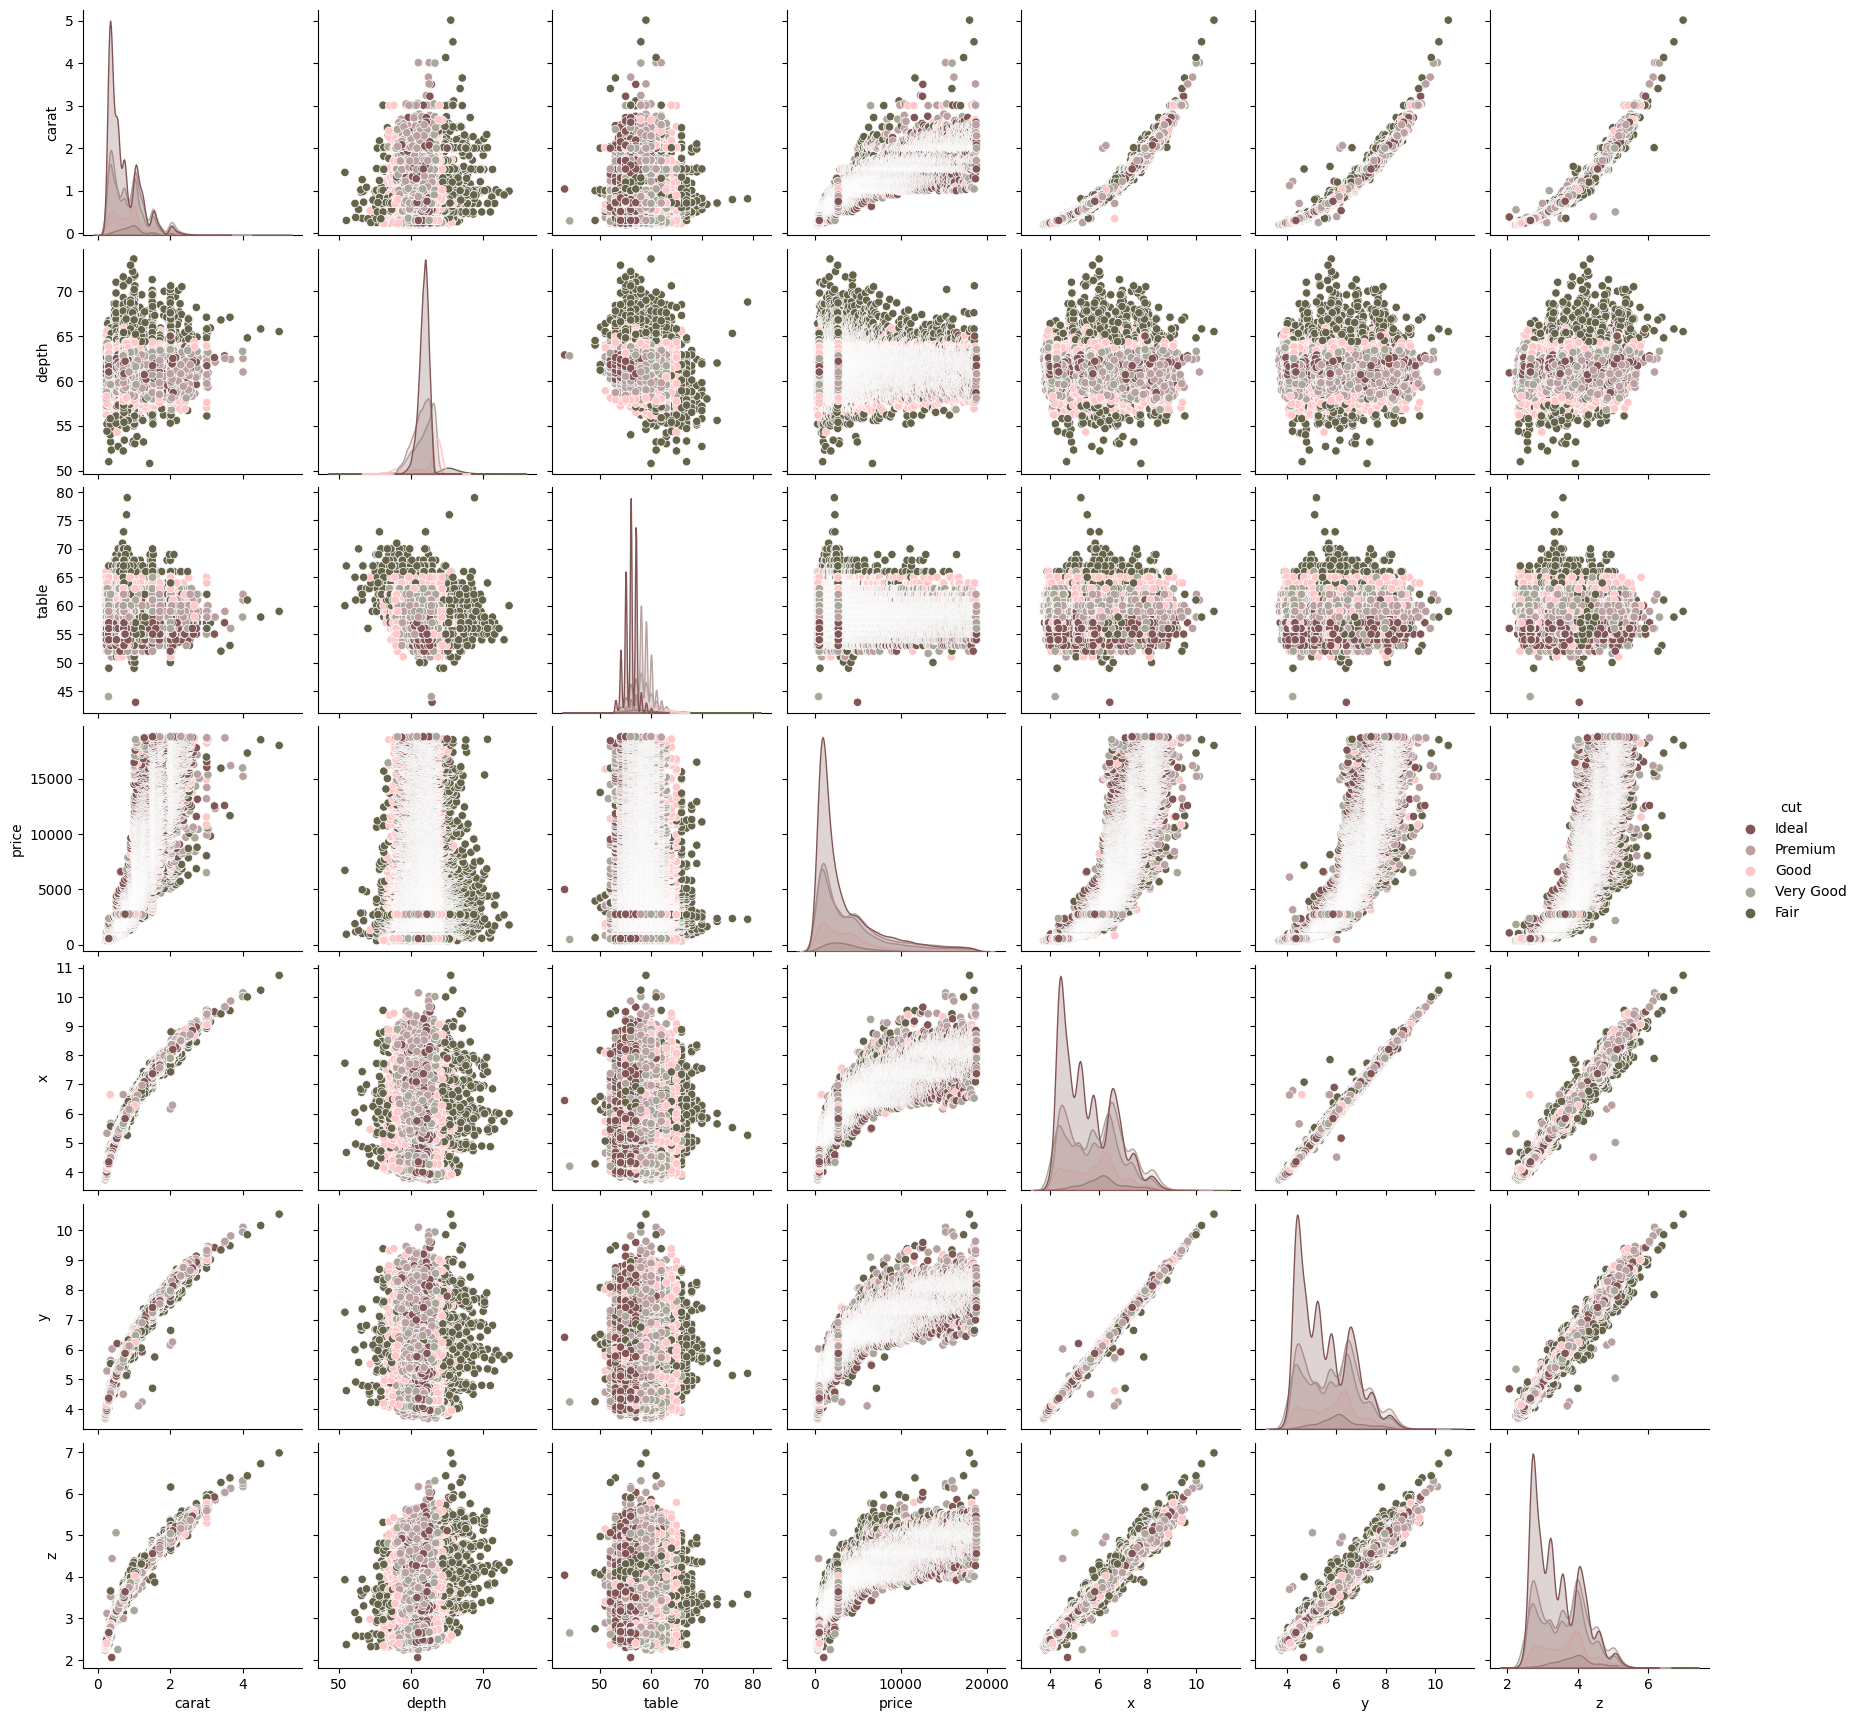

In [ ]:
shade = ["#835656", "#baa0a0", "#ffc7c8", 
         "#a9a799", "#65634a"]#shades for hue
ax = sns.pairplot(data, 
                  hue= "cut",palette=shade)

# Categorical Data

In [ ]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


# Encoding Label Data

In [ ]:
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
    print(label_encoder.classes_)


['Fair' 'Good' 'Ideal' 'Premium' 'Very Good']
['D' 'E' 'F' 'G' 'H' 'I' 'J']
['I1' 'IF' 'SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2']


# Plotting Heat map for visualization of Data

<Axes: >

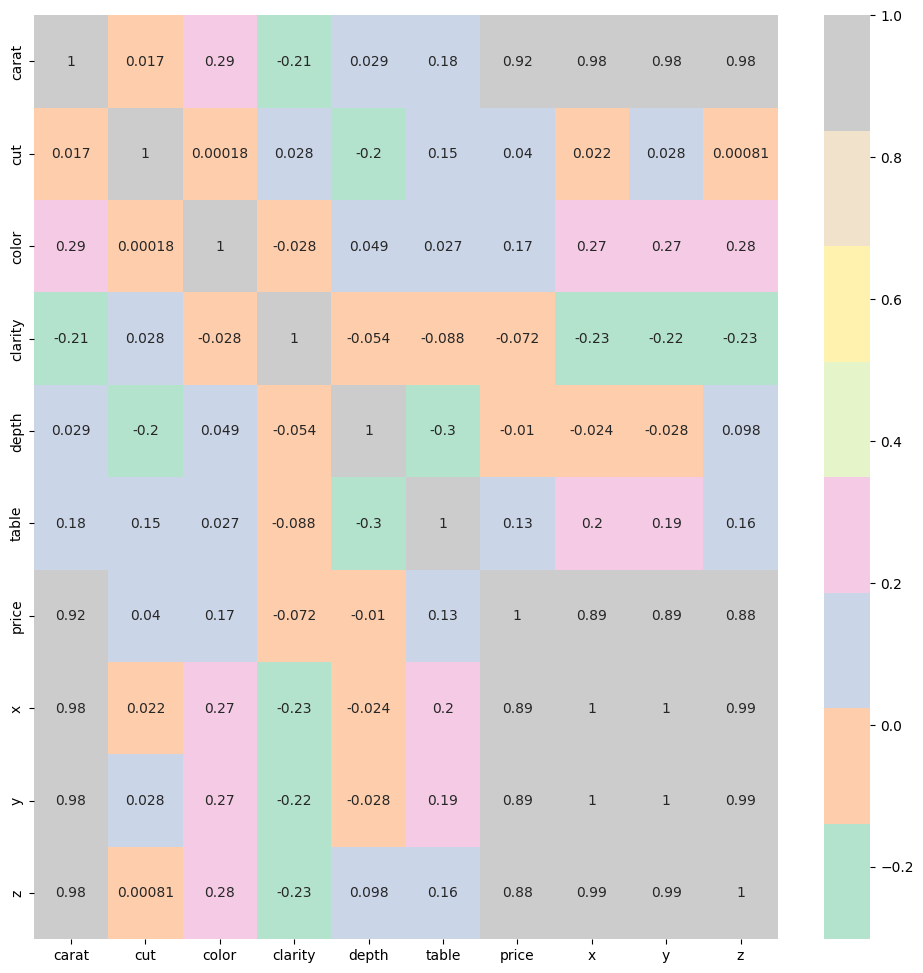

In [ ]:
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap="Pastel2",annot=True)

# from the above heat map we can see that there a great relation between carat X ,Y , Z and price and X,Y,Z


# Seperating Dependent and independent variable

In [ ]:
X= label_data.drop(["price"],axis =1) #indipendent Variable
y= label_data["price"] #dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7) #breaking the whole data into test and train data and test size being 25% of the whole data.

# Building pipelins of standard scaler and model for varios regressors.

In [ ]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines

In [ ]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference

In [ ]:
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines

In [ ]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Training The data on the train data for different ml models

In [ ]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1348.811824 
DecisionTree: -754.263881 
RandomForest: -548.525179 
KNeighbors: -823.648809 
XGBRegressor: -545.458108 


# Saving The XGboost Model

In [ ]:
file_name = "xgb_reg.pkl"
pickle.dump(pipeline_xgb, open(file_name, "wb"))

# Loading the Model

In [ ]:
xgb_model_loaded = pickle.load(open(file_name, "rb"))

# Testing the Xgboost Model on Unseen Data

In [ ]:
preds = xgb_model_loaded.predict(X_test)

# Printing the score of the model on the unseen data for XGboost

In [ ]:
print("R^2:",metrics.r2_score(y_test, preds))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, preds))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, preds))
print("MSE:",metrics.mean_squared_error(y_test, preds))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preds)))

R^2: 0.9810847980166805
Adjusted R^2: 0.9810721569817172
MAE: 278.0934000996743
MSE: 296738.36462685897
RMSE: 544.7369682946614


# Printing the test data and the predicted data side by side for comparision

In [ ]:
print("y_test"+"\t"+"predicted")
preds=np.array(preds)
y_test=np.array(y_test)
for i in range(100):
  print(y_test[i],"\t",preds[i])

y_test	predicted
6426 	 6044.187
2771 	 2776.2
3903 	 4165.1465
3678 	 2983.033
660 	 817.1408
2080 	 3218.5725
4693 	 4582.642
2473 	 2655.3484
6890 	 6638.843
2301 	 2465.8503
2959 	 2981.931
5666 	 4595.8936
402 	 429.58032
4223 	 4580.8955
1651 	 1725.8209
4518 	 4305.2197
6560 	 6734.6655
980 	 1031.1082
865 	 854.7442
3002 	 3378.5728
891 	 892.31995
765 	 732.6218
4717 	 4258.67
5016 	 5485.0127
16512 	 12941.276
2104 	 2117.2673
1922 	 1923.9839
2432 	 2460.39
5216 	 5243.3545
5694 	 5903.694
969 	 830.73456
802 	 758.8424
4060 	 4514.3286
876 	 728.0196
561 	 607.4851
775 	 691.0442
1114 	 981.3996
7978 	 9263.306
2970 	 3318.63
4633 	 4992.581
7388 	 6221.368
1600 	 1857.1204
10995 	 13748.146
902 	 943.3107
756 	 721.42065
863 	 940.57947
710 	 730.31366
10236 	 10382.021
671 	 757.32745
955 	 975.6602
2170 	 2322.5947
1896 	 1879.7169
814 	 873.6719
1295 	 1269.1688
717 	 818.56824
7079 	 6585.8496
1974 	 1950.845
3293 	 3168.1406
2680 	 2953.8708
552 	 612.9261
6870 	 8364

# Checking How Many times the dimond price was Over estimated ,under estimated and how many times it was exact on point

In [ ]:
cou = 0
cou1= 0 
cou2= 0
for i in range(len(y_test)):
  if(int(y_test[i])<int(preds[i])):
    cou+=1
  if(int(y_test[i])>int(preds[i])):
    cou1+=1
  if(int(y_test[i])==int(preds[i])):
    cou2+=1
print("Over Estimated","\t","Under estimated","\t","Exact Estimation")
print(cou,"\t\t",cou1,"\t\t\t",cou2)
print("Total test values","\tSum of estimated values")
print(len(y_test),"\t\t\t\t",(cou+cou1+cou2))
print(cou+cou2)

Over Estimated 	 Under estimated 	 Exact Estimation
6909 		 6532 			 36
Total test values 	Sum of estimated values
13477 				 13477
6945


# Saving The Decision Tree Model in a pickle file

In [ ]:
file_name = "dt_reg.pkl"
pickle.dump(pipeline_dt, open(file_name, "wb"))

# Loading the Decision Tree Model

In [ ]:
dt_model_loaded = pickle.load(open(file_name, "rb"))

# Predicting Using The Decision Tree Model

In [ ]:
preds_dt = dt_model_loaded.predict(X_test)

# Accuracy Testing of Decision Tree Model

In [ ]:
print("R^2:",metrics.r2_score(y_test, preds_dt))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, preds_dt))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, preds_dt))
print("MSE:",metrics.mean_squared_error(y_test, preds_dt))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preds_dt)))

R^2: 0.9644120238710859
Adjusted R^2: 0.9643882404163329
MAE: 360.51977443051123
MSE: 558297.9154114417
RMSE: 747.1933587843522


# Printing the first 100 test value and predicted values side by side for comparision for decision tree

In [ ]:
print("y_test"+"\t"+"predicted")
preds_dt=np.array(preds_dt)
y_test=np.array(y_test)
for i in range(100):
  print(y_test[i],"\t",preds_dt[i])

y_test	predicted
6426 	 6055.0
2771 	 2564.0
3903 	 4847.0
3678 	 3655.0
660 	 700.0
2080 	 2364.0
4693 	 4189.0
2473 	 2527.0
6890 	 6728.0
2301 	 2433.0
2959 	 3053.0
5666 	 5294.0
402 	 352.0
4223 	 4150.0
1651 	 1644.0
4518 	 4449.0
6560 	 6619.0
980 	 1021.0
865 	 1028.0
3002 	 3352.0
891 	 891.0
765 	 765.0
4717 	 4354.0
5016 	 5183.0
16512 	 13370.0
2104 	 1996.0
1922 	 1672.0
2432 	 2327.0
5216 	 4864.0
5694 	 5408.0
969 	 969.0
802 	 802.0
4060 	 4235.0
876 	 953.0
561 	 561.0
775 	 838.0
1114 	 1040.0
7978 	 10115.0
2970 	 3539.0
4633 	 4653.0
7388 	 7154.0
1600 	 1813.0
10995 	 13232.0
902 	 913.0
756 	 756.0
863 	 1107.0
710 	 710.0
10236 	 10327.0
671 	 758.0
955 	 955.0
2170 	 2360.0
1896 	 1922.0
814 	 814.0
1295 	 1295.0
717 	 791.0
7079 	 6319.0
1974 	 1909.0
3293 	 3670.0
2680 	 2538.0
552 	 521.0
6870 	 6512.0
8789 	 8861.0
630 	 491.0
7688 	 6535.0
2918 	 3581.0
1333 	 1433.0
1449 	 1427.0
2818 	 2697.0
1035 	 1276.0
5510 	 5910.0
5632 	 5540.0
10607 	 8645.0
1061 	

# Checking For how many values were Over estimated ,under estimated and how many were on point for Decision Tree

In [ ]:
cou = 0
cou1= 0 
cou2= 0
for i in range(len(y_test)):
  if(int(y_test[i])<int(preds_dt[i])):
    cou+=1
  if(int(y_test[i])>int(preds_dt[i])):
    cou1+=1
  if(int(y_test[i])==int(preds_dt[i])):
    cou2+=1
print("Over Estimated","\t","Under estimated","\t","Exact Estimation")
print(cou,"\t\t",cou1,"\t\t\t",cou2)
print("Total test values","\tSum of estimated values")
print(len(y_test),"\t\t\t\t",(cou+cou1+cou2))
print(cou+cou2)

Over Estimated 	 Under estimated 	 Exact Estimation
5953 		 5878 			 1646
Total test values 	Sum of estimated values
13477 				 13477
7599


# Saving the Random forest Model in a pickle file

In [ ]:
file_name = "rf_reg.pkl"
pickle.dump(pipeline_rf, open(file_name, "wb"))

# Loading the saved random forest model

In [ ]:
rf_model_loaded = pickle.load(open(file_name, "rb"))

# Predicting the price of diamond from the test values using Random Forest

In [ ]:
preds_rf = rf_model_loaded.predict(X_test)

# Using Metrics to print the accuracy of the Random Forest Model

In [ ]:
print("R^2:",metrics.r2_score(y_test, preds_rf))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, preds_rf))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, preds_rf))
print("MSE:",metrics.mean_squared_error(y_test, preds_rf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preds_rf)))

R^2: 0.9806873716084552
Adjusted R^2: 0.9806744649733082
MAE: 271.3063982269616
MSE: 302973.12027685327
RMSE: 550.4299412975763


# Printing the first 100 test value and predicted values side by side for comparision for Random Forest 

In [ ]:
print("y_test"+"\t"+"predicted")
preds_rf=np.array(preds_rf)
y_test=np.array(y_test)
for i in range(100):
  print(y_test[i],"\t",preds_rf[i])

y_test	predicted
6426 	 5978.58
2771 	 2639.66
3903 	 4455.67
3678 	 3451.15
660 	 676.98
2080 	 2853.24
4693 	 4416.76
2473 	 2566.92
6890 	 6774.19
2301 	 2440.53
2959 	 3098.9
5666 	 4969.26
402 	 392.78
4223 	 4441.33
1651 	 1633.92
4518 	 4456.32
6560 	 6458.11
980 	 1015.37
865 	 995.15
3002 	 3309.62
891 	 892.62
765 	 764.0
4717 	 4203.41
5016 	 5447.97
16512 	 13897.821000000002
2104 	 2090.0
1922 	 1878.03
2432 	 2575.96
5216 	 5133.41
5694 	 5444.55
969 	 915.15
802 	 786.11
4060 	 4893.12
876 	 870.26
561 	 560.46
775 	 810.29
1114 	 1079.17
7978 	 9451.28
2970 	 3482.71
4633 	 4715.15
7388 	 6697.63
1600 	 1796.18
10995 	 13147.36
902 	 928.1
756 	 745.74
863 	 998.76
710 	 704.94
10236 	 10103.86
671 	 754.09
955 	 924.83
2170 	 2279.14
1896 	 1905.34
814 	 822.1
1295 	 1276.12
717 	 771.2
7079 	 6662.53
1974 	 1965.86
3293 	 3300.12
2680 	 2990.38
552 	 554.95
6870 	 10078.06
8789 	 8976.2825
630 	 587.88
7688 	 7280.04
2918 	 3122.32
1333 	 1328.29
1449 	 1512.28
2818 	

# Checking For how many values were Over estimated ,under estimated and how many were on point for Random Forest

In [ ]:
cou = 0
cou1= 0 
cou2= 0
for i in range(len(y_test)):
  if(int(y_test[i])<int(preds_rf[i])):
    cou+=1
  if(int(y_test[i])>int(preds_rf[i])):
    cou1+=1
  if(int(y_test[i])==int(preds_rf[i])):
    cou2+=1
print("Over Estimated","\t","Under estimated","\t","Exact Estimation")
print(cou,"\t\t",cou1,"\t\t\t",cou2)
print("Total test values","\tSum of estimated values")
print(len(y_test),"\t\t\t\t",(cou+cou1+cou2))
print(cou+cou2)

Over Estimated 	 Under estimated 	 Exact Estimation
6660 		 6718 			 99
Total test values 	Sum of estimated values
13477 				 13477
6759


# As We can See in the Decision tree gives us better estimation of Price of Diamonds So we will be using Decision Tree as Our Model